<font size = 5>**Interactive Adaptive Processes with Different Timescales Underlie Short-Term Motor Learning**</font>

link - https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.0040179

In [1]:
import numpy as np
import matplotlib.pyplot as plt

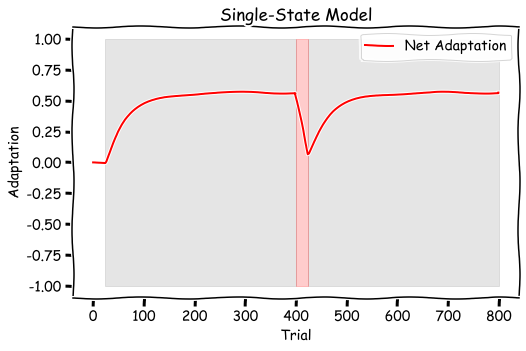

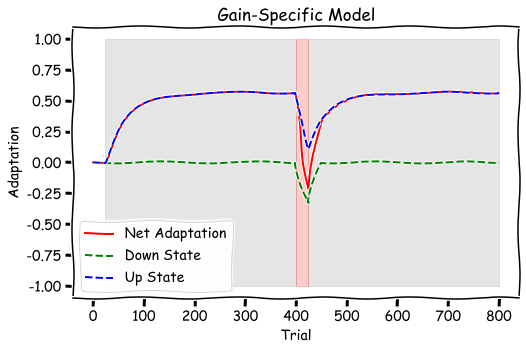

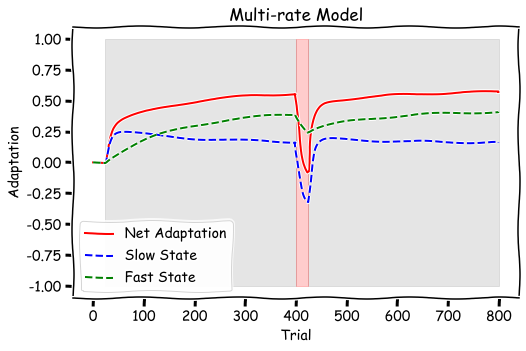

In [4]:
#single state model 

#constants 
A = 0.99
B = 0.013

#trials
trials = np.arange(0, 800)

#create the purturbation schedule
purt = np.zeros(800)
purt[24:399] = 1
purt[399:424] = -1
purt[424:800] = 1


#single state model
#create x array
X = np.zeros(len(trials))

#initial values 
x = 0
e = 0

for t in range(len(trials)):
    
    xx = A * x + B * e
    e = purt[t] - xx
    x = xx
    
    X[t] = xx


#plot of the single state model
plt.xkcd()
plt.figure(figsize = (8, 5))
plt.plot(trials, X, color = 'r', label = 'Net Adaptation')
plt.fill_between([24,399], [1], [-1], color = 'grey', alpha = 0.2)
plt.fill_between([424, 800], [1], [-1], color = 'grey', alpha = 0.2)
plt.fill_between([400, 424], [1], [-1], color = 'r', alpha = 0.2)
plt.title('Single-State Model')
plt.xlabel('Trial')
plt.ylabel('Adaptation')
plt.legend()
plt.show()

#two state, gain-specific model
X_g = np.zeros(len(trials))
X1_g = np.zeros(len(trials))
X2_g = np.zeros(len(trials))

#initial conditions
x1_g = 0
x2_g = 0
e = 0

for t in range(len(trials)):
    
    x1 = np.min([0, A * x1_g + B * e])
    x2 = np.max([0, A * x2_g + B * e])
    x_g = x1_g + x2_g
       
    X_g[t] = x_g
    X1_g[t] = x1
    X2_g[t] = x2
    
    #update the values
    x1_g = x1
    x2_g = x2
    e = purt[t] - x_g
    
#plot of the single state model
plt.xkcd()
plt.figure(figsize = (8, 5))
#plt.plot(trials, purt, color = 'k')
plt.plot(trials, X_g, color = 'r', label = 'Net Adaptation')
plt.plot(trials, X1_g, color = 'g', linestyle = '--', label = 'Down State')
plt.plot(trials, X2_g, color = 'b', linestyle = '--', label = 'Up State')
plt.fill_between([24,399], [1], [-1], color = 'grey', alpha = 0.2)
plt.fill_between([424, 800], [1], [-1], color = 'grey', alpha = 0.2)
plt.fill_between([400, 424], [1], [-1], color = 'r', alpha = 0.2)
plt.title('Gain-Specific Model')
plt.xlabel('Trial')
plt.ylabel('Adaptation')
plt.legend()
plt.show()

#gain independent gain specific model

#initial conditions
Af = 0.92
Bf = 0.03
As = 0.996
Bs = 0.004

#state arrays
X_m = np.zeros(len(trials))
X1_m = np.zeros(len(trials))
X2_m = np.zeros(len(trials))

#initial conditions
x1_m = 0
x2_m = 0
e = 0 

for t in range(len(trials)):
    
    x1 = Af * x1_m + Bf * e
    x2 = As * x2_m + Bs * e
    x_m = x1 + x2
    
    #collect all the values
    X1_m[t] = x1
    X2_m[t] = x2
    X_m[t] = x_m 
    
    #update the values
    x1_m = x1
    x2_m = x2
    e = purt[t] - x_m

    
#plot of the multi rate model
plt.xkcd()
plt.figure(figsize = (8, 5))
#plt.plot(trials, purt, color = 'k')
plt.plot(trials, X_m, color = 'r', label = 'Net Adaptation')
plt.plot(trials, X1_m, color = 'b', linestyle = '--', label = 'Slow State')
plt.plot(trials, X2_m, color = 'g', linestyle = '--', label = 'Fast State')
plt.fill_between([24,399], [1], [-1], color = 'grey', alpha = 0.2)
plt.fill_between([424, 800], [1], [-1], color = 'grey', alpha = 0.2)
plt.fill_between([400, 424], [1], [-1], color = 'r', alpha = 0.2)
plt.title('Multi-rate Model')
plt.xlabel('Trial')
plt.ylabel('Adaptation')
plt.legend()
plt.show()
